In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.duplicated().sum()

0

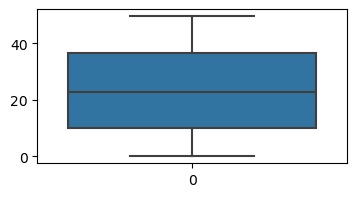

In [11]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Radio'])
plt.show()

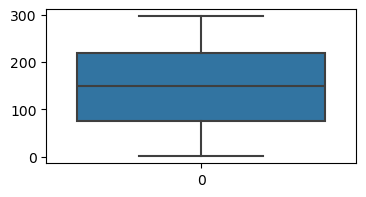

In [12]:
plt.figure(figsize = (4,2))
sns.boxplot(df['TV'])
plt.show()

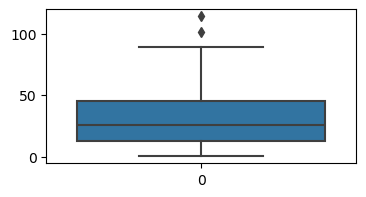

In [13]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Newspaper'])
plt.show()

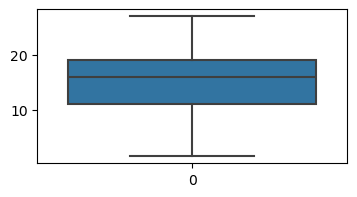

In [14]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Sales'])
plt.show()

<Axes: >

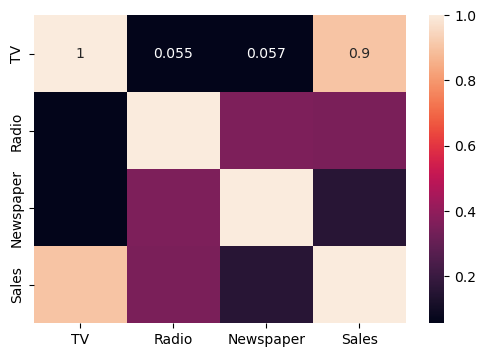

In [15]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

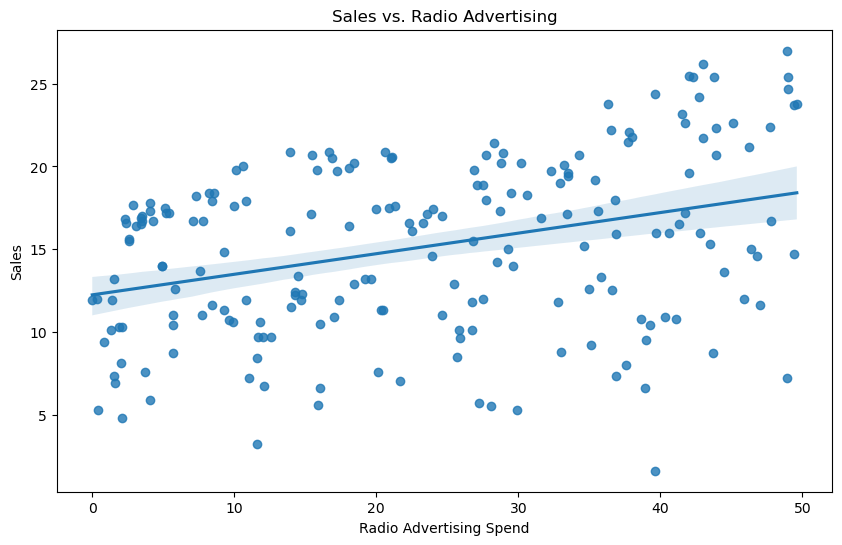

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Radio', y='Sales', data=df)
plt.title('Sales vs. Radio Advertising')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.show()

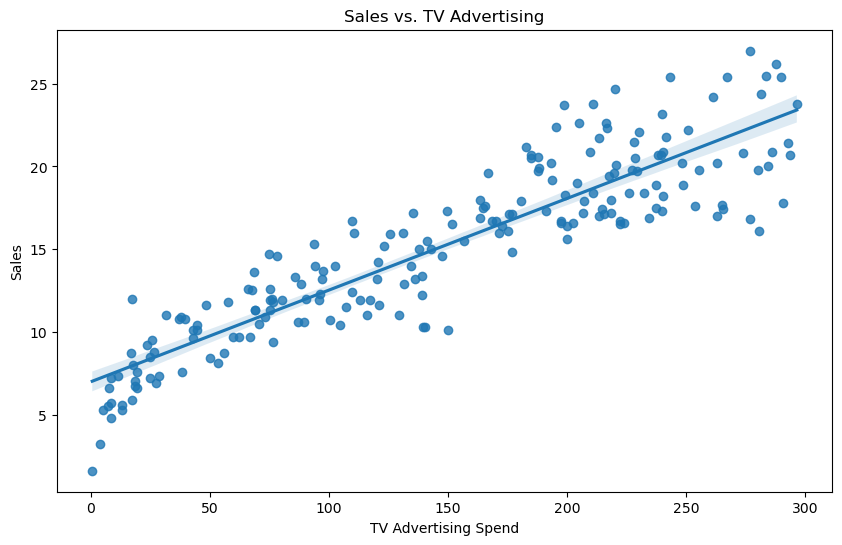

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='TV', y='Sales', data=df)
plt.title('Sales vs. TV Advertising')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

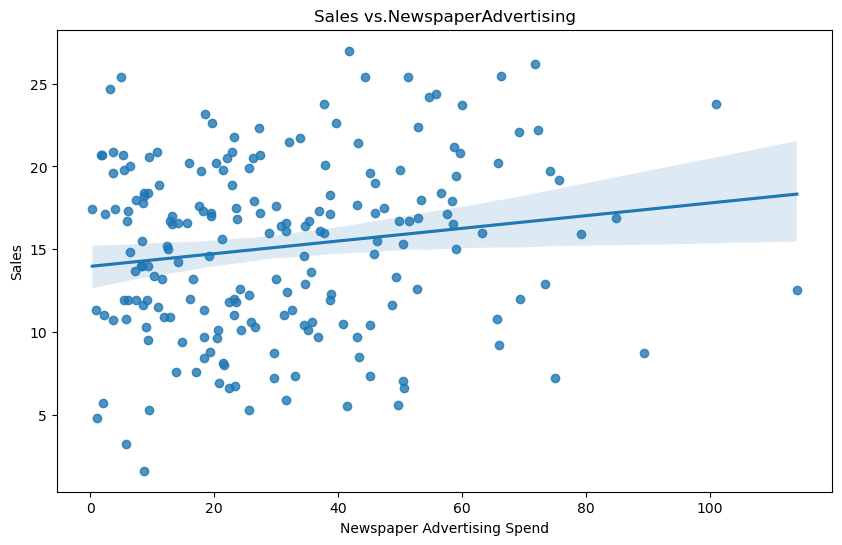

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Newspaper', y='Sales', data=df)
plt.title('Sales vs.NewspaperAdvertising')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.show()

In [21]:
x = df.drop('Sales', axis = 1) 


y = df['Sales'] 

In [22]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [24]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
x_train.shape

(160, 3)

In [26]:
x_test.shape

(40, 3)

In [27]:
y_test.shape

(40,)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(40,)
[20.05680901 12.40598288 12.10468193  5.32077358  9.13929398 21.27271014
 11.40845389 16.94370712 21.00021116 14.55708323 15.79945559 19.39419516
 19.50811083 19.47772028  8.24773027  6.88147961  8.83937023 18.13432199
 12.09981963 17.12098387 16.45418773 16.42115588 13.25428722 24.89683275
 14.2218603  17.47113696 18.93472856 16.58722154  9.69227275  9.32763297
  7.79109171  9.59710806  9.56843792 14.71698139  9.77467607 20.52351573
 21.14020194  7.10515277 16.87573388 20.94126531]


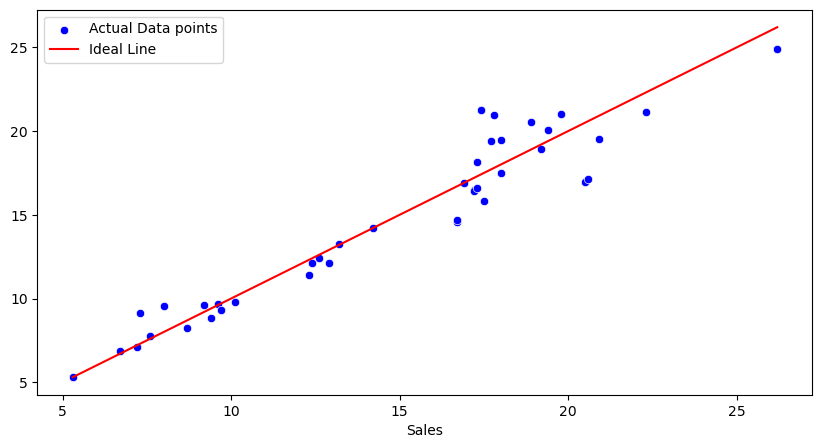

In [30]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [31]:
results = np.column_stack((y_test, y_pred))


# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         19.40 |         20.06
         12.60 |         12.41
         12.40 |         12.10
          5.30 |          5.32
          7.30 |          9.14
         17.40 |         21.27
         12.30 |         11.41
         20.50 |         16.94
         19.80 |         21.00
         16.70 |         14.56
         17.50 |         15.80
         17.70 |         19.39
         20.90 |         19.51
         18.00 |         19.48
          8.70 |          8.25
          6.70 |          6.88
          9.40 |          8.84
         17.30 |         18.13
         12.90 |         12.10
         20.60 |         17.12
         17.20 |         16.45
         17.20 |         16.42
         13.20 |         13.25
         26.20 |         24.90
         14.20 |         14.22
         18.00 |         17.47
         19.20 |         18.93
         17.30 |         16.59
          9.60 |          9.69
          9.70 |          9.33
     

In [32]:
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)

#measure r2_score
r2 =r2_score(y_test, y_pred)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R2_score:" , r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
R2_score: 0.9152883879390787
Mean Squared Error: 2.1676849115793377
Root Mean Squared Error: 1.4723059843590047


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

r2_dt =r2_score(y_test, y_pred)
DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print("r2_score: ", r2_dt)
print('Decision Tree Regression: ',DTr)

r2_score:  0.9152883879390787
Decision Tree Regression:  1.84225


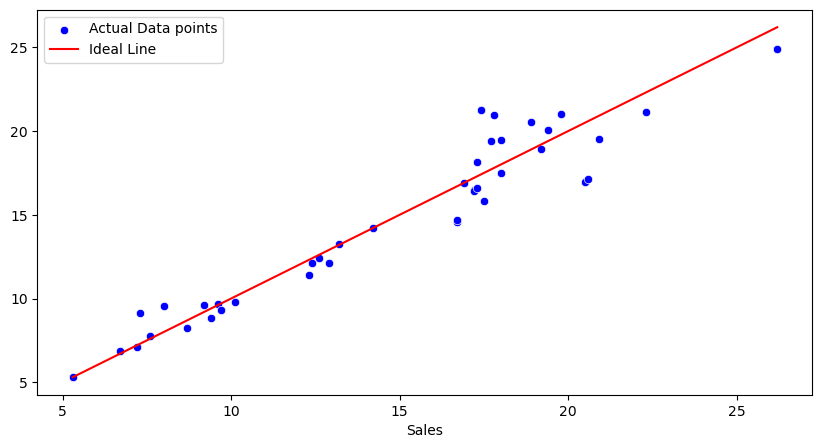

In [34]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()